**Imports**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
movies_df = pd.read_csv("../input/movies-on-netflix-prime-video-hulu-and-disney/MoviesOnStreamingPlatforms.csv")

In [21]:
movies_df = movies_df.drop(["Unnamed: 0", "ID"], axis=1)

In [22]:
movies_df.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,The Irishman,2019,18+,98/100,1,0,0,0,0
1,Dangal,2016,7+,97/100,1,0,0,0,0
2,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,Roma,2018,18+,94/100,1,0,0,0,0


In [23]:
palette_colors = ["#72efdd", "#a2d2ff", "#ff6b6b","#95d5b2"]

In [24]:
custom_palette = sns.set_palette(sns.color_palette(palette_colors))

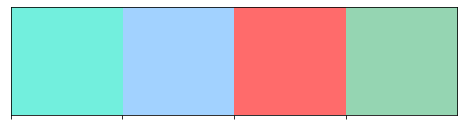

In [25]:
sns.palplot(sns.color_palette(palette_colors), size=2)

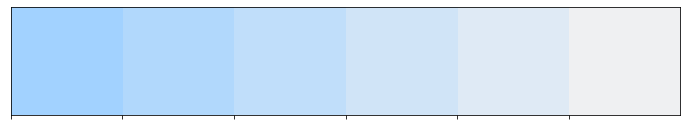

In [26]:
netflix_palette = sns.light_palette(palette_colors[1], reverse=True)
sns.palplot(sns.color_palette(netflix_palette), size=2)

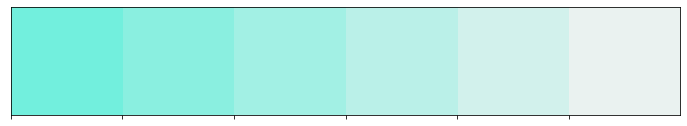

In [27]:
prime_palette = sns.light_palette(palette_colors[0], reverse=True)
sns.palplot(sns.color_palette(prime_palette), size=2)

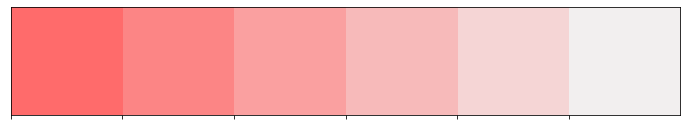

In [28]:
hulu_palette = sns.light_palette(palette_colors[2], reverse=True)
sns.palplot(sns.color_palette(hulu_palette), size=2)

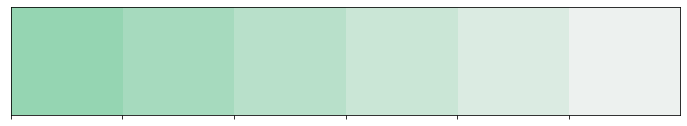

In [29]:
disney_palette = sns.light_palette(palette_colors[3], reverse=True)
sns.palplot(sns.color_palette(disney_palette), size=2)

In [39]:
movie_count = [movies_df[col].sum() for col in ["Netflix", "Hulu", "Prime Video", "Disney+"]]

In [31]:
platform_movies_list = [movies_df[(movies_df[col]==1)] for col in ["Netflix", "Hulu", "Prime Video", "Disney+"]]

In [32]:
movies_count_per_age = [df["Age"].value_counts().to_dict() for i, df in enumerate(platform_movies_list)]
movies_count_per_age

[{'18+': 877, '13+': 404, '7+': 322, '16+': 151, 'all': 144},
 {'18+': 383, '13+': 175, '7+': 98, 'all': 36, '16+': 26},
 {'18+': 1090, '7+': 421, '13+': 397, 'all': 160, '16+': 97},
 {'all': 370, '7+': 278, '13+': 70, '16+': 4, '18+': 3}]

# **Donut Plot**

In [33]:
def donut_plot(splot, data, label, title):
    plt.subplot(splot)
    donut_center_circle = plt.Circle((0,0), 0.5, color="black", fc="white", linewidth=2)
    plt.pie(data, 
            labels=label, 
            colors=palette_colors,
            autopct="%.2f%%",
            shadow=True
           )
    current_fig = plt.gcf()
    current_fig.gca().add_artist(donut_center_circle)
    plt.title(title)

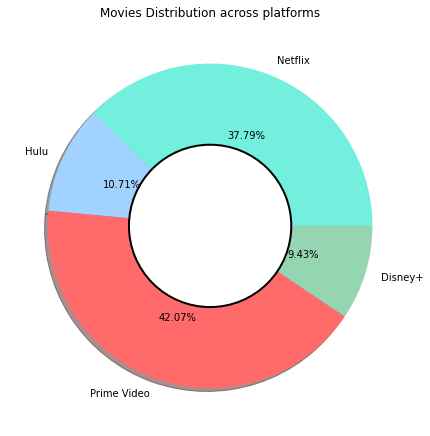

In [34]:
plt.figure(figsize=(16, 8))
donut_plot(121, movie_count, ["Netflix", "Hulu", "Prime Video", "Disney+"], "Movies Distribution across platforms")
plt.show()

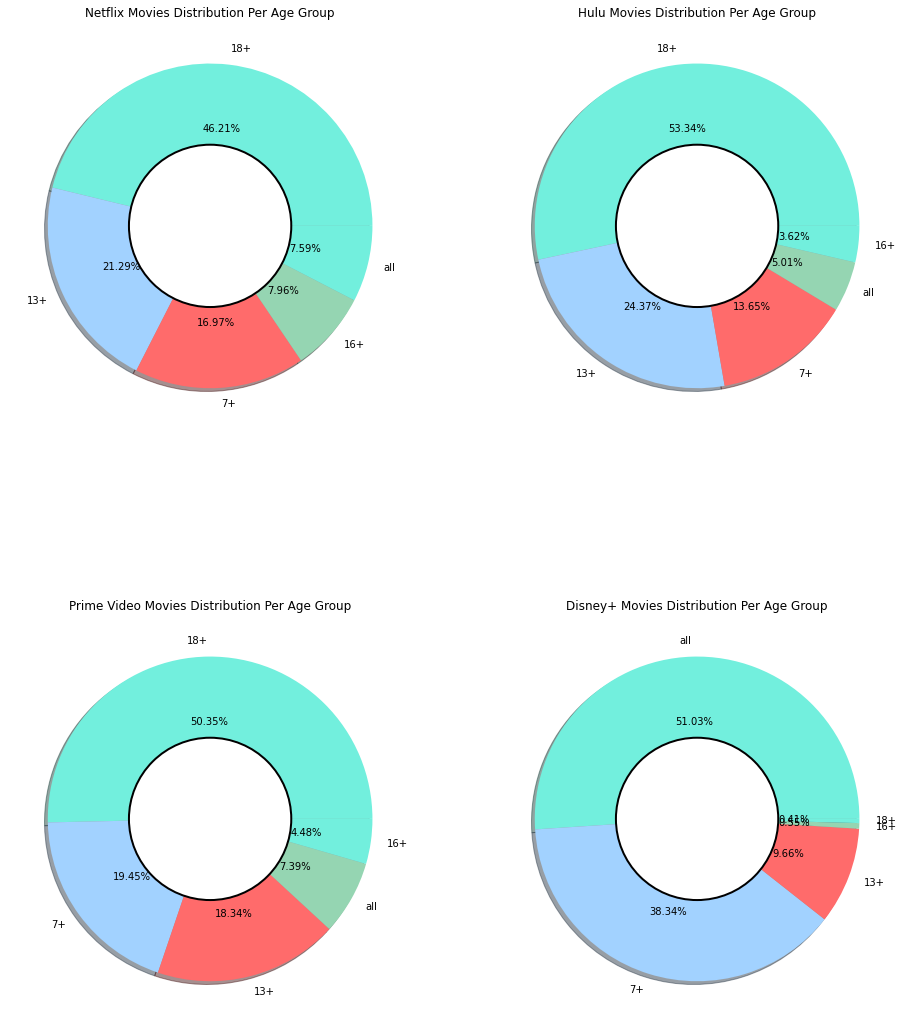

In [35]:
plt.figure(figsize=(16, 20))
donut_plot(221, list(movies_count_per_age[0].values()), list(movies_count_per_age[0].keys()), "Netflix Movies Distribution Per Age Group")
donut_plot(222, list(movies_count_per_age[1].values()), list(movies_count_per_age[1].keys()), "Hulu Movies Distribution Per Age Group")
donut_plot(223, list(movies_count_per_age[2].values()), list(movies_count_per_age[2].keys()), "Prime Video Movies Distribution Per Age Group")
donut_plot(224, list(movies_count_per_age[3].values()), list(movies_count_per_age[3].keys()), "Disney+ Movies Distribution Per Age Group")
plt.show()

# **Kernel Density Estimation Plot**

In [36]:
def kde_plot(splot, i, col_name):
    plt.subplot(splot)
    sns.kdeplot(data=platform_movies_list[i][col_name], color=palette_colors[i],shade=True)
    plt.xlabel(col_name, fontsize = 15)
    plt.legend(fontsize=25)

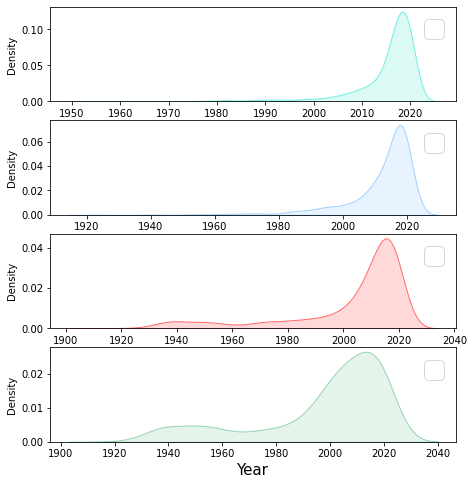

In [37]:
plt.figure(figsize = (16, 8))
kde_plot(421, 0, 'Year')
kde_plot(423, 1, 'Year')
kde_plot(425, 2, 'Year')
kde_plot(427, 3, 'Year')
plt.show()

# **Bar Chart**

In [38]:
movies_df.sort_values(by='Year', ascending=False)[0:500].style.bar(subset=["Netflix"], color=palette_colors[0])\
.bar(subset=["Hulu"], color=palette_colors[1])\
.bar(subset=["Prime Video"], color=palette_colors[2])\
.bar(subset=["Disney+"], color=palette_colors[3])\
.bar(subset=["Year"], color='#').background_gradient(cmap='Purples')

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
825,Thunder Force,2021,13+,65/100,1,0,0,0,0
648,Rurouni Kenshin: The Final,2021,nan,67/100,1,0,0,0,0
7559,Hampton's Legion,2021,nan,42/100,0,0,1,0,0
305,Army of the Dead,2021,18+,75/100,1,0,0,0,0
3929,Willy's Wonderland,2021,18+,69/100,0,1,0,0,0
1548,A Week Away,2021,18+,56/100,1,0,0,0,0
1057,Nayattu,2021,18+,61/100,1,0,0,0,0
3943,Some Kind of Heaven,2021,13+,68/100,0,1,0,0,0
655,Major Grom: Plague Doctor,2021,nan,67/100,1,0,0,0,0
657,Seaspiracy,2021,18+,67/100,1,0,0,0,0


In [53]:
# Calculate the number of movies for each platform
movie_counts = {
    "Netflix": movies_df["Netflix"].sum(),
    "Hulu": movies_df["Hulu"].sum(),
    "Prime Video": movies_df["Prime Video"].sum(),
    "Disney+": movies_df["Disney+"].sum()
}

# Display the counts
print("Number of movies on each platform:")
for platform, count in movie_counts.items():
    print(f"{platform}: {count}")
    
print("*******************")

print("Total number of entries in the dataset:", len(movies_df))
print("Movies without age ratings:", movies_df[movies_df["Age"].isnull()].shape[0])
print("Movies without Rotten Tomatoes scores:", movies_df[movies_df["Rotten Tomatoes"].isnull()].shape[0])
print("*******************")

total_movies = {
    "Total Movies": len(movies_df),
    "Netflix": movies_df["Netflix"].sum(),
    "Hulu": movies_df["Hulu"].sum(),
    "Prime Video": movies_df["Prime Video"].sum(),
    "Disney+": movies_df["Disney+"].sum()
}

for platforms, counts in total_movies.items():
    print(f"{platforms}: {counts}")
    
print("*******************")
print("Number of duplicate entries in the dataset:", movies_df.duplicated().sum())

Number of movies on each platform:
Netflix: 1754
Hulu: 682
Prime Video: 2005
Disney+: 355
*******************
Total number of entries in the dataset: 4640
Movies without age ratings: 0
Movies without Rotten Tomatoes scores: 0
*******************
Total Movies: 4640
Netflix: 1754
Hulu: 682
Prime Video: 2005
Disney+: 355
*******************
Number of duplicate entries in the dataset: 0


In [41]:
# Descriptive statistics for Age and Rotten Tomatoes Scores
netflix_stats = movies_df[movies_df["Netflix"] == 1]["Age"].describe()
disney_stats = movies_df[movies_df["Disney+"] == 1]["Age"].describe()

netflix_rt_stats = movies_df[movies_df["Netflix"] == 1]["Rotten Tomatoes"].describe()
disney_rt_stats = movies_df[movies_df["Disney+"] == 1]["Rotten Tomatoes"].describe()

print("Netflix Age Stats:\n", netflix_stats)
print("Disney+ Age Stats:\n", disney_stats)
print("Netflix Rotten Tomatoes Stats:\n", netflix_rt_stats)
print("Disney+ Rotten Tomatoes Stats:\n", disney_rt_stats)

Netflix Age Stats:
 count     1898
unique       5
top        18+
freq       877
Name: Age, dtype: object
Disney+ Age Stats:
 count     725
unique      5
top       all
freq      370
Name: Age, dtype: object
Netflix Rotten Tomatoes Stats:
 count       3688
unique        82
top       46/100
freq         122
Name: Rotten Tomatoes, dtype: object
Disney+ Rotten Tomatoes Stats:
 count        922
unique        65
top       48/100
freq          32
Name: Rotten Tomatoes, dtype: object
